<a href="https://colab.research.google.com/github/francji1/01DAS/blob/main/lectures/lecture_04_word2vec/01ADS_L04c_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fast and Furious Introduction into [Word2Vec](https://en.wikipedia.org/wiki/Word2vec)




### What is it?
It's a Natural Language Processing [NLP] algorithm that transforms words to vectors.

### When do I use it?
When I want to explore semantics of words. For example: find word's oposites, find context word etc.

### Why should I use it?
1] NLP

2] It's a general idea of mapping elements (eg. strings) onto vectors (and vectors are good to work with). I can use it for recommending next product or a song in playlist.

# How does it work?

* Word2Vec is actualy shallow Neural Network [NN] (1 hidden layer).

* **Starting point:**
    * We have N words.
    * Each word is represented by N-dimensional vector with 1 on index position and 0s elsewhere (one-hot encoding).


* We let the NN predict word's naighbours.


* We cut out only the guts of the trained NN - scored hidden leayer values for each word.


* **End point:**
    * Each word is represented by only M-dimension vector (M << N), that carries some context information.   **:-)**

### Why is it important to have vectors instead of words? Because we have the Algebra!



## Word2Vec: one-hot encoding
<img src="https://github.com/francji1/01DAS/blob/main/lectures/lecture_04_word2vec/one_hot.png?raw=1" alt="one_hot" style="width: 600px;"/>

## Word2Vec: Word2Vec output
<img src="https://github.com/francji1/01DAS/blob/main/lectures/lecture_04_word2vec/w2v_output.png?raw=1" alt="w2v_output" style="width: 600px;"/>

 Word2Vec can help us solve word analogies: The most classic example `king - man + woman = queen` is possible thanks to the embedings (vector space representation)

## Approaches:
* **Skipgram** [SG]
    * Predicts context words from the target word. Uses neighbour words as an input to NN and central word as an output.
    * Slower training (processes each context word separately), but can provide better representations for rare words.
    *  Produces embeddings that capture semantic relationships.


* **Continuous Bag Of Words** [CBOW]
    * Predicts the target word from context. Uses central word as an input to NN and neighbour words as an output.
    * Faster trainning (considers the entire context window at once).
    * Produces embeddings that capture syntactic similarities.

## Word2Vec: Word neighborhood
<img src="https://github.com/francji1/01DAS/blob/main/lectures/lecture_04_word2vec/word_neighbour.png?raw=1" alt="word_neighbour" style="width: 600px;"/>

## Word2Vec: Skipgram method: Target → Context
<img src="https://github.com/francji1/01DAS/blob/main/lectures/lecture_04_word2vec/skipgram.png?raw=1" alt="skipgram" style="width: 600px;"/>

## Word2Vec: CBOW method: Context → Target
<img src="https://github.com/francji1/01DAS/blob/main/lectures/lecture_04_word2vec/cbow.png?raw=1" alt="skipgram" style="width: 600px;"/>

In addition to NLP:
Word2Vec methods have inspired vectorization in Graph embeddings for social networks or product embeddings in recommendation engines.

## Let's code

In [ ]:
!pip install umap-learn
!pip install plotly

In [ ]:
import pandas as pd
import numpy as np

import gensim
from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

import umap

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import random

## Dataset - QUORA

In [ ]:
# Load the dataset
# df = pd.read_csv("data/quora.csv")

# Read the data from the URL
df_path = "https://raw.githubusercontent.com/francji1/01DAS/refs/heads/main/lectures/lecture_04_word2vec/data/quora.csv"
df = pd.read_csv(df_path, sep=",")
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
# Transfer the dataset into list of lists
def read_questions(row,column_name):
    return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))

documents = []
for index, row in df.iterrows():
    documents.append(read_questions(row,"question1"))
    if row["is_duplicate"] == 0:
        documents.append(read_questions(row,"question2"))

In [ ]:
# document example
documents[:4]

[['what',
  'is',
  'the',
  'step',
  'by',
  'step',
  'guide',
  'to',
  'invest',
  'in',
  'share',
  'market',
  'in',
  'india'],
 ['what',
  'is',
  'the',
  'step',
  'by',
  'step',
  'guide',
  'to',
  'invest',
  'in',
  'share',
  'market'],
 ['what', 'is', 'the', 'story', 'of', 'kohinoor', 'koh', 'noor', 'diamond'],
 ['what',
  'would',
  'happen',
  'if',
  'the',
  'indian',
  'government',
  'stole',
  'the',
  'kohinoor',
  'koh',
  'noor',
  'diamond',
  'back']]

## Model build

In [ ]:
# Lets train the word2vec model using skipgram/cbow
#sg=0: Continuous Bag of Words (CBOW) method: Predict the target word using its surrounding context words
#sg=1: Skip-gram method: Predict the surrounding context words using the target word

w2v_model = gensim.models.Word2Vec(vector_size=100, window=10, min_count=5, sg=0, workers=10)
w2v_model.build_vocab(documents)  # 'documents' must be tokenized properly
w2v_model.train(corpus_iterable=documents, total_examples=len(documents), epochs=10)

(50354034, 70289020)

In [ ]:
w2v_model_sg = gensim.models.Word2Vec(vector_size=100, window=10, min_count=5, sg=1, workers=10)
w2v_model_sg.build_vocab(documents)  # 'documents' must be tokenized properly
w2v_model_sg.train(corpus_iterable=documents, total_examples=len(documents), epochs=10)


(50353105, 70289020)

## Model exploration

In [ ]:
# Model vocabulary
vocabulary_words = w2v_model.wv.index_to_key
print(f"Our vocabulary has {len(vocabulary_words)} words.")

Our vocabulary has 27775 words.


In [ ]:
CBOW
word = 'trump'
print(f"Word {word} is represented by {len(w2v_model.wv[word])}-dim vector:")
w2v_model.wv[word]

Word trump is represented by 100-dim vector:


array([ 1.2382530e+00, -8.3060783e-01,  1.2495372e+00,  2.9914615e+00,
        3.1254342e+00, -1.9022100e+00,  7.7654493e-01, -1.3245404e+00,
        2.8435245e-01,  2.3130625e-01, -4.3357663e+00,  5.4676452e+00,
        2.2412496e+00, -9.6135443e-01, -7.6715654e-01, -6.1163962e-01,
       -2.1028299e+00,  5.1764932e+00, -1.8887218e+00,  3.7788570e+00,
        1.2194679e+00, -1.1708572e+00,  7.7148390e-01, -4.1469369e+00,
       -1.0279920e+00,  4.8643537e+00,  1.3887012e+00, -2.4948745e+00,
       -1.9037497e+00, -3.5654418e+00, -9.3631148e-01, -7.7137280e-01,
        4.6658719e-01,  2.1640573e+00,  2.3723936e+00,  3.6870842e+00,
        1.7616564e+00,  1.1325114e+00,  3.9858232e+00,  7.5606567e-01,
       -2.6578777e+00, -4.0808563e+00,  2.1625464e+00,  2.1340835e+00,
       -3.4567831e+00,  1.6627947e+00,  3.5974336e+00, -7.0382757e+00,
        2.4327593e+00,  2.5073502e+00,  1.8622589e+00,  3.3395821e-01,
       -2.6915878e-01,  5.2524195e+00,  1.0848508e+00,  1.4003630e+00,
      

In [ ]:
#SG
word = 'trump'
print(f"Word {word} is represented by {len(w2v_model_sg.wv[word])}-dim vector:")
w2v_model_sg.wv[word]

In [ ]:
# Get the word vectors from the trained Word2Vec model
def plot_word_embeddings(w2v_model, words_to_plot=None, method='PCA'):
    # Get all words and their corresponding vectors
    words = w2v_model.wv.index_to_key  # All vocabulary words
    word_vectors = np.array([w2v_model.wv[word] for word in words])

    # If words_to_plot is provided, limit the plot to those words
    if words_to_plot is not None:
        words = [word for word in words if word in words_to_plot]
        word_vectors = np.array([w2v_model.wv[word] for word in words])

    # Dimensionality reduction: PCA or t-SNE
    if method == 'PCA':
        reducer = PCA(n_components=2)
    elif method == 't-SNE':
        reducer = TSNE(n_components=2, random_state=42)

    reduced_embeddings = reducer.fit_transform(word_vectors)

    # Plotting the embeddings
    plt.figure(figsize=(14, 10))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=100, alpha=0.7, edgecolors='k')

    for i, word in enumerate(words):
        plt.text(reduced_embeddings[i, 0] + 0.02, reduced_embeddings[i, 1], word, fontsize=12)

    plt.title(f'Word Embeddings Visualized Using {method}')
    plt.show()

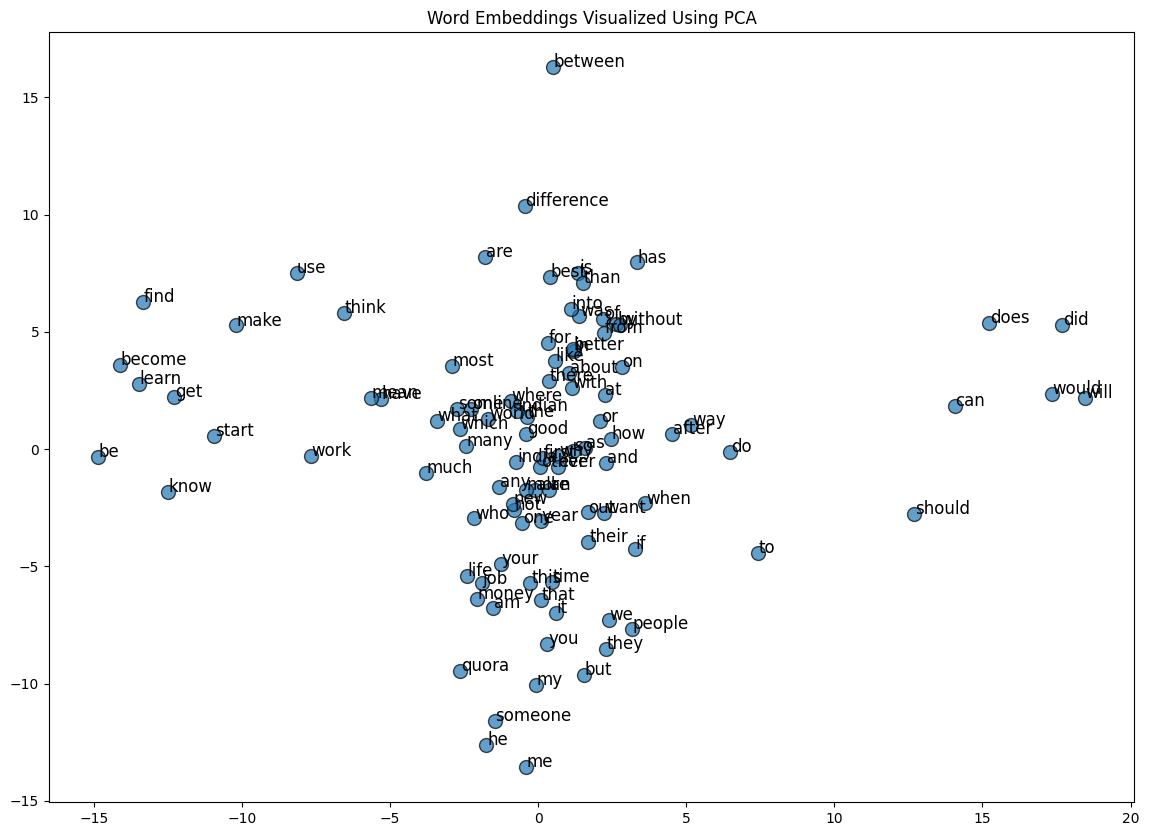

In [ ]:
# Plot a subset of words from the vocabulary (plot only the first 100 words)
plot_word_embeddings(w2v_model, words_to_plot=vocabulary_words[:100], method='PCA')


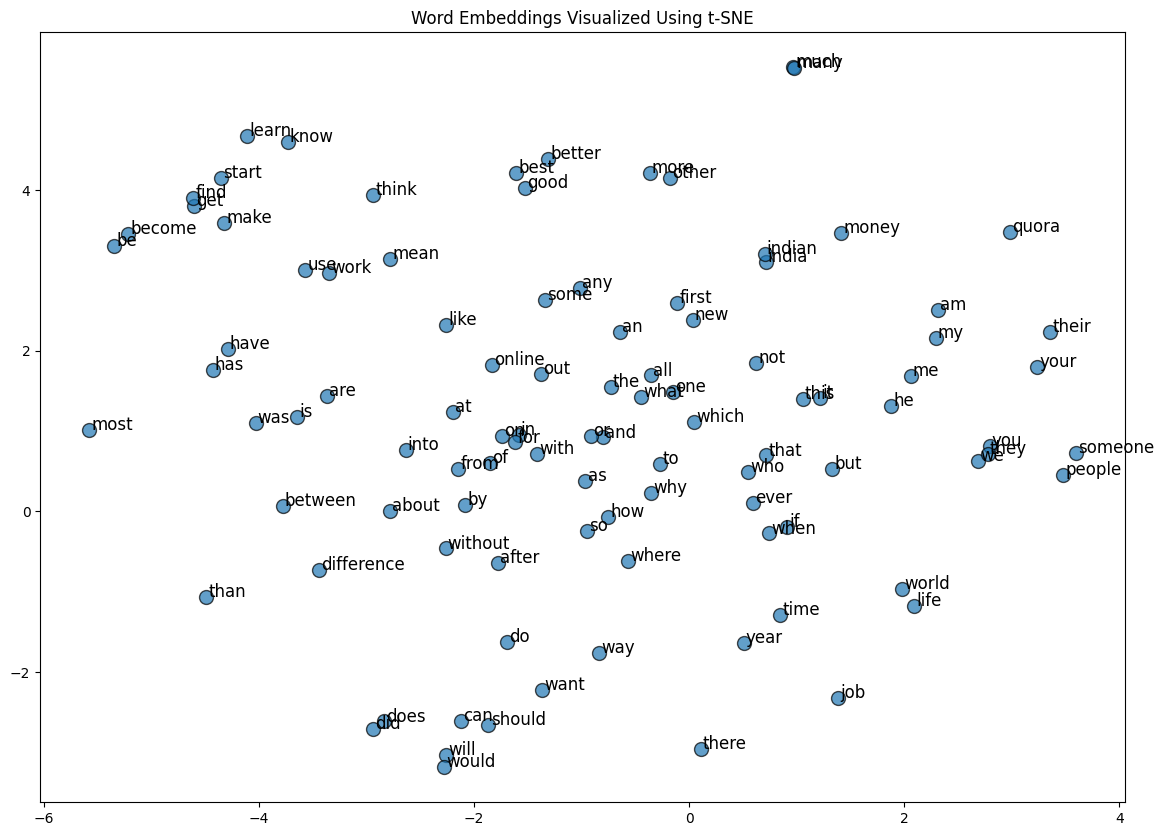

In [ ]:
# Plot with t-SNE
plot_word_embeddings(w2v_model, words_to_plot=vocabulary_words[:100], method='t-SNE')


In [ ]:
# Function to plot word embeddings using different dimensionality reduction methods
def plot_word_embeddings(w2v_model, words_to_plot=None, method='PCA'):
    # Get all words and their corresponding vectors
    words = w2v_model.wv.index_to_key  # All vocabulary words
    word_vectors = np.array([w2v_model.wv[word] for word in words])

    # If words_to_plot is provided, limit the plot to those words
    if words_to_plot is not None:
        words = [word for word in words if word in words_to_plot]
        word_vectors = np.array([w2v_model.wv[word] for word in words])

    # Dimensionality reduction: PCA, t-SNE, UMAP, Isomap
    if method == 'PCA':
        reducer = PCA(n_components=2)
    elif method == 't-SNE':
        reducer = TSNE(n_components=2, perplexity=40, random_state=42)
    elif method == 'UMAP':
        reducer = umap.UMAP(n_components=2, random_state=42)
    elif method == 'Isomap':
        reducer = Isomap(n_components=2)
    else:
        raise ValueError("Unsupported method. Choose from: 'PCA', 't-SNE', 'UMAP', or 'Isomap'")

    # Apply the dimensionality reduction technique
    reduced_embeddings = reducer.fit_transform(word_vectors)

    # Plotting the embeddings
    plt.figure(figsize=(14, 10))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], s=100, alpha=0.7, edgecolors='k')

    for i, word in enumerate(words):
        plt.text(reduced_embeddings[i, 0] + 0.02, reduced_embeddings[i, 1], word, fontsize=12)

    plt.title(f'Word Embeddings Visualized Using {method}')
    plt.show()


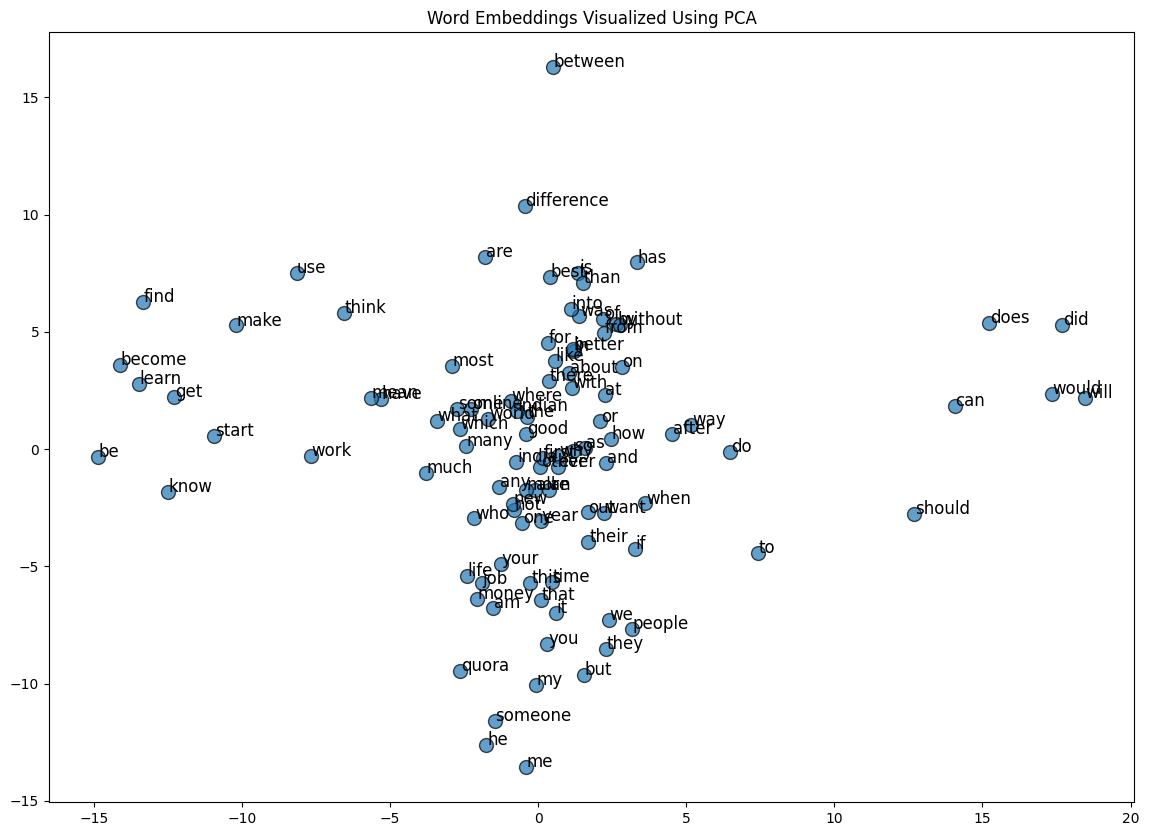

In [ ]:
# plot a subset of words from the vocabulary (plot only the first 100 words)
plot_word_embeddings(w2v_model, words_to_plot=vocabulary_words[:100], method='PCA')  # For PCA


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



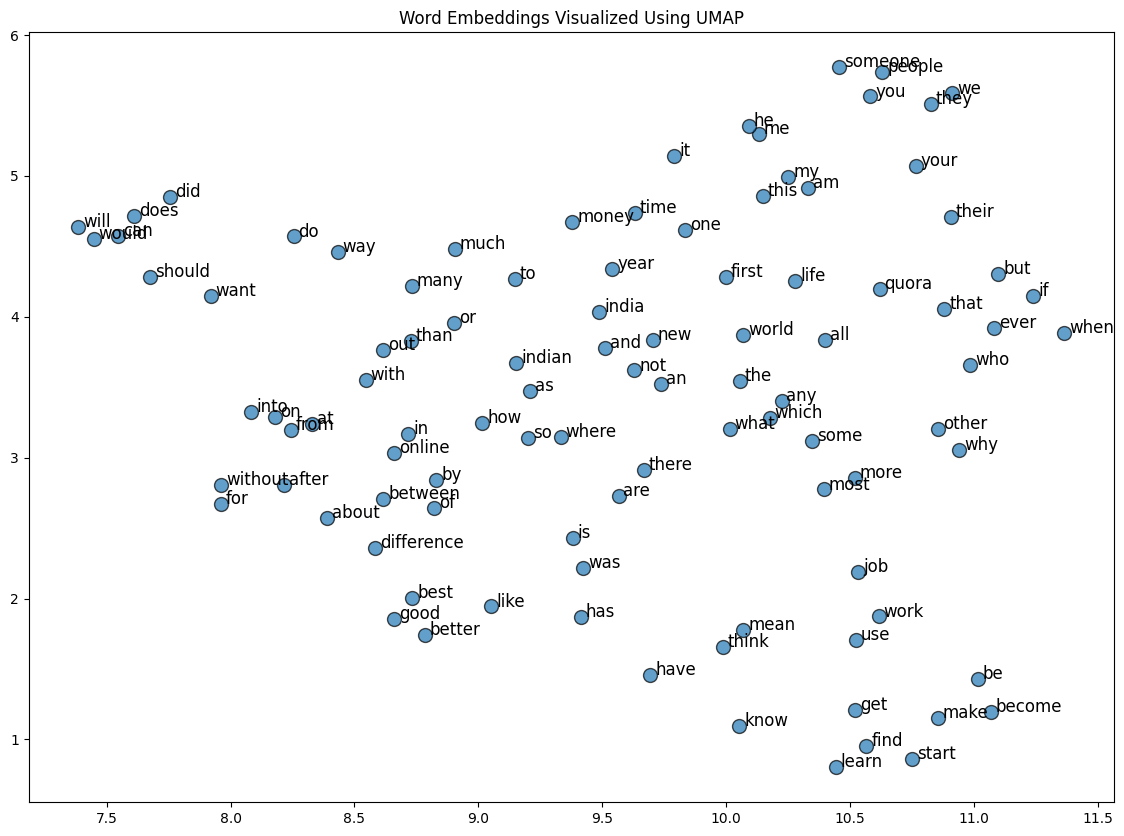

In [ ]:
# plot using UMAP:
plot_word_embeddings(w2v_model, words_to_plot=vocabulary_words[:100], method='UMAP')


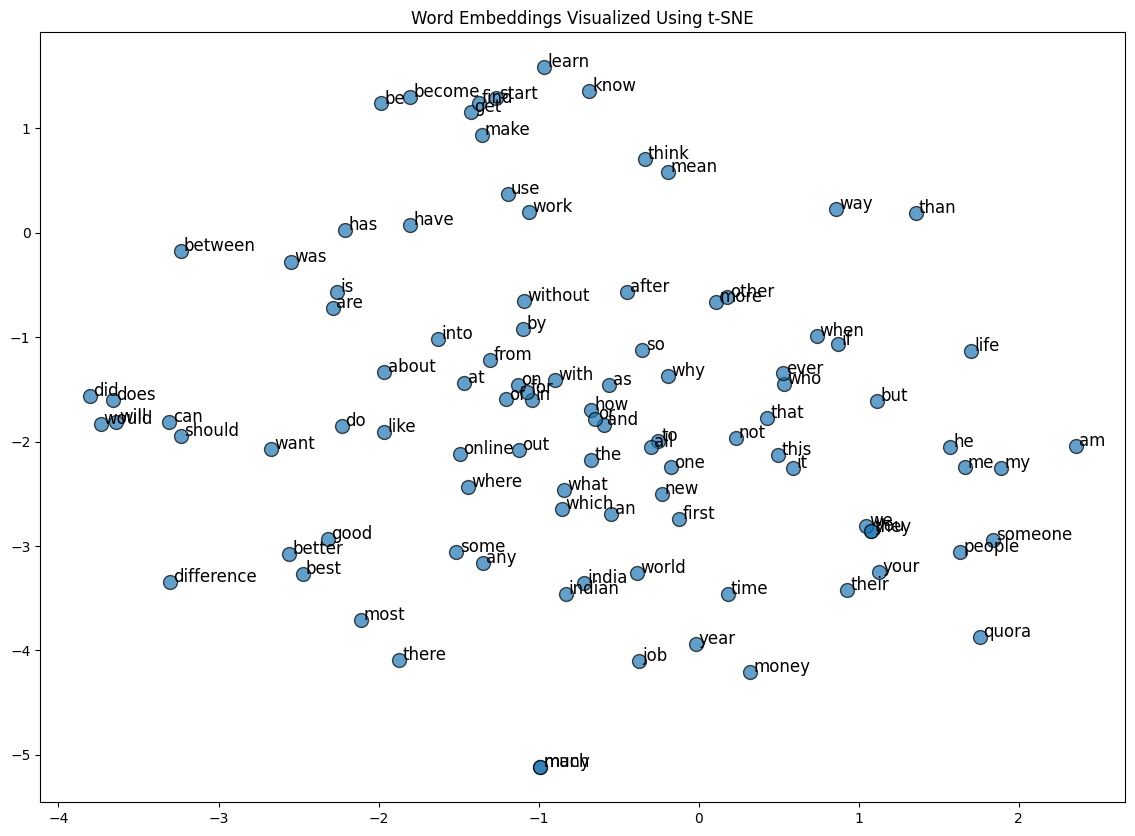

In [ ]:
# plot using t-SNE:
plot_word_embeddings(w2v_model, words_to_plot=vocabulary_words[:100], method='t-SNE')


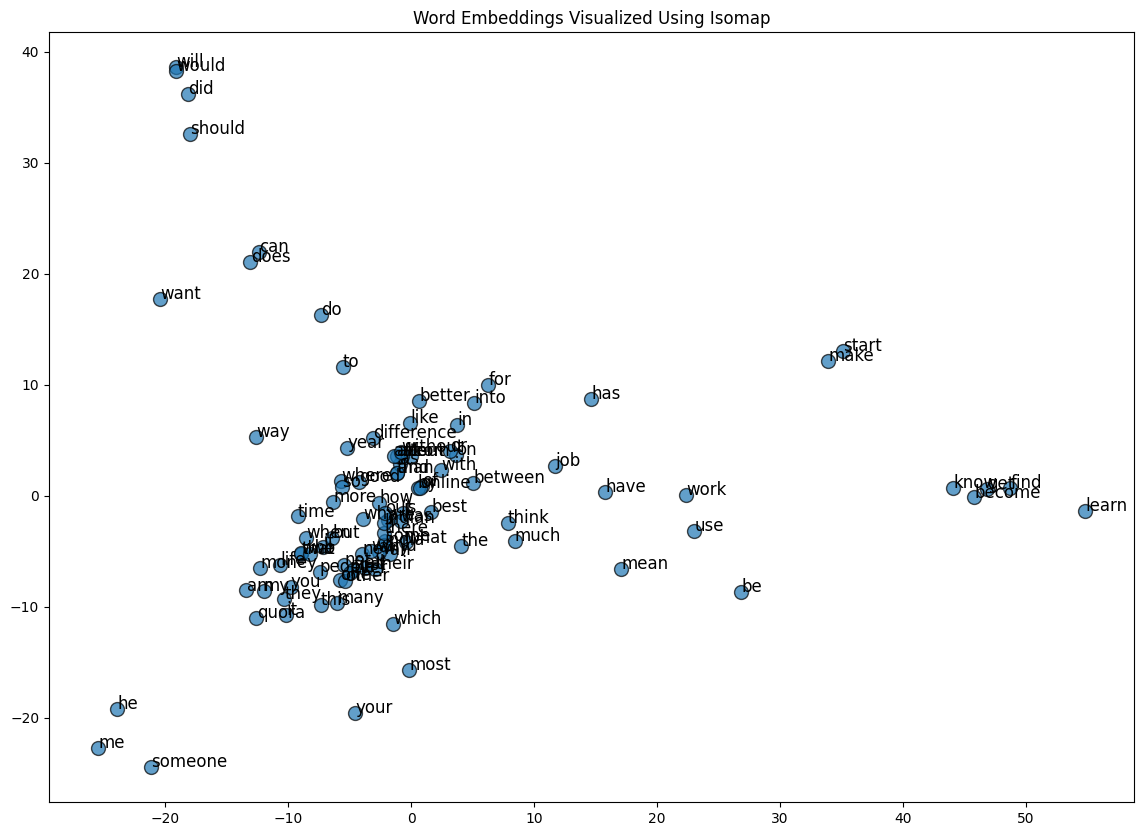

In [ ]:
# plot using Isomap:
plot_word_embeddings(w2v_model, words_to_plot=vocabulary_words[:100], method='Isomap')


In [ ]:
!pip install plotly

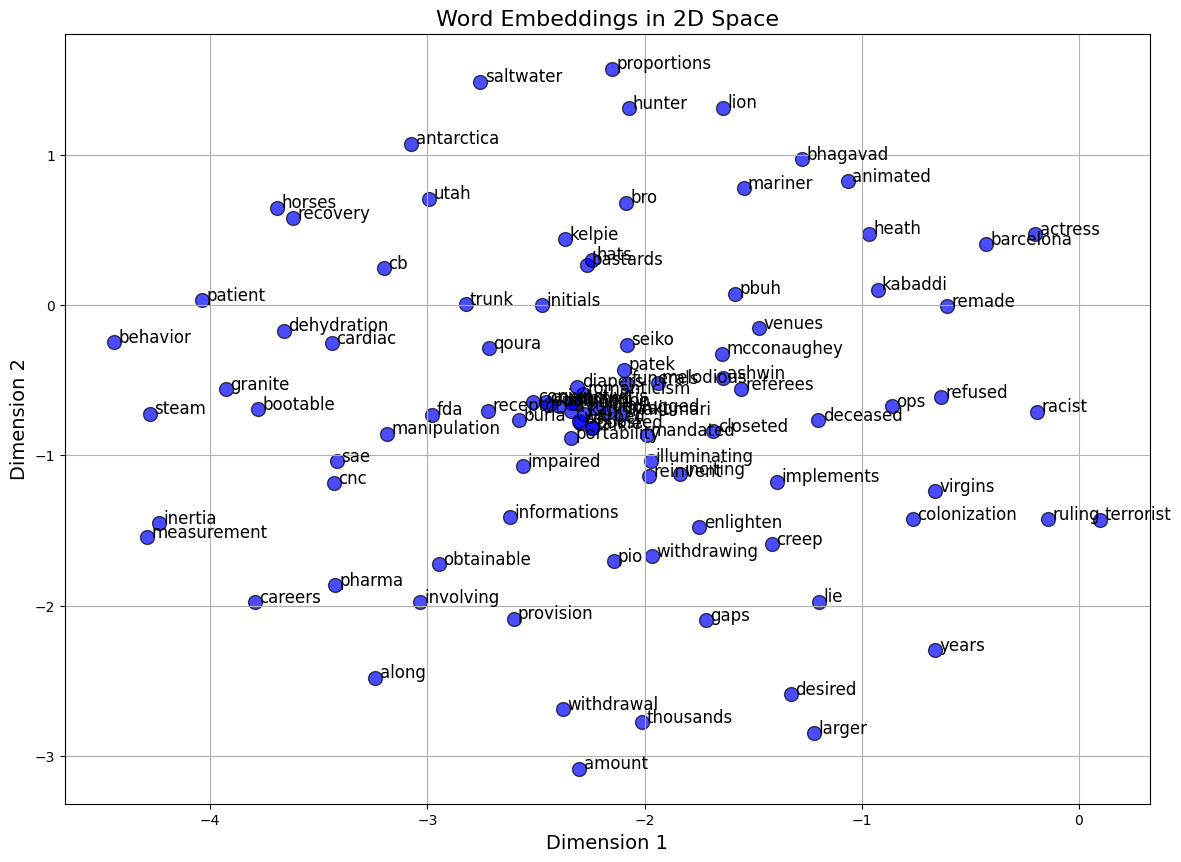

In [ ]:
# TSNE representation of N words
N = 100
wanted_vocab = random.sample(list(w2v_model.wv.index_to_key), N)  # Use index_to_key instead of vocab
X = w2v_model.wv[wanted_vocab]  # X is an array of word vectors, each vector containing 150 tokens

# TSNE transformation
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", max_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

# Plotting the TSNE result
plt.figure(figsize=(14, 10))
plt.scatter(Y[:, 0], Y[:, 1], color='blue', s=100, alpha=0.7, edgecolor='k')

# Add text labels for each word in wanted_vocab
for i, word in enumerate(wanted_vocab):
    plt.text(Y[i, 0] + 0.02, Y[i, 1], word, fontsize=12, color='black')

# Set plot title and axis labels
plt.title('Word Embeddings in 2D Space', fontsize=16)
plt.xlabel('Dimension 1', fontsize=14)
plt.ylabel('Dimension 2', fontsize=14)

# Display the plot
plt.grid(True)
plt.show()

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio

# Create the scatter plot
trace = go.Scatter(
    x=Y[:, 0],
    y=Y[:, 1],
    text=wanted_vocab,
    mode='markers+text',  # Show both markers and text
    textposition='top center',  # Position text labels above the markers
    marker=dict(
        size=12,
        color='rgba(152, 0, 0, .8)',  # Custom marker color
        line=dict(width=2, color='DarkSlateGrey')  # Add border around markers
    ),
    textfont=dict(
        size=12,
        color='black'  # Customize text color
    )
)

# Layout settings
layout = go.Layout(
    title='Word Embeddings in 2D Space',  # Title of the plot
    xaxis=dict(title='Dimension 1'),  # X-axis label
    yaxis=dict(title='Dimension 2'),  # Y-axis label
    showlegend=False,  # Hide legend
    height=600,  # Height of the plot
    width=800  # Width of the plot
)

# Combine trace and layout into a figure
fig = go.Figure(data=[trace], layout=layout)

# Use plotly.io.show() to display the plot in Colab
pio.show(fig)



# Cosine Similarity

* What is cosine similarity?
* What is the range?
* Is it focused on direction or magnitude?
* Is it sensitive to "curse of dimensionality"?

It is efficient for sparse and High-Dimensional data, easy to compute and aligns well with semantic similarity.

## Using the model

In [ ]:
# Find similar word
words1 = ['dog', 'cat', 'house']

In [ ]:
for word in words1:
    print(f"Nearest neighbors for {word}:")
    neighbors = w2v_model.wv.most_similar(word, topn=5)
    for neighbor in neighbors:
        print(f"  {neighbor[0]}: {neighbor[1]:.4f}")
    print("\n")

Nearest neighbors for dog:
  kitten: 0.6771
  mom: 0.6755
  bite: 0.6394
  puppy: 0.6366
  dogs: 0.6226


Nearest neighbors for cat:
  gmat: 0.7036
  xat: 0.6547
  percentile: 0.6063
  iim: 0.5973
  neet: 0.5912


Nearest neighbors for house:
  bedroom: 0.6305
  apartment: 0.5357
  room: 0.5123
  town: 0.4906
  car: 0.4883




In [ ]:
w2v_model.wv.most_similar(positive=words1, topn=10)

[('mom', 0.6283800005912781),
 ('dad', 0.6190169453620911),
 ('kitten', 0.6073780655860901),
 ('father', 0.5827316045761108),
 ('parents', 0.5782887935638428),
 ('son', 0.5647413730621338),
 ('roommate', 0.5647194981575012),
 ('baby', 0.5641341209411621),
 ('bed', 0.5631645917892456),
 ('bedroom', 0.5568029284477234)]

In [ ]:
# Find similar word
words1 = ['husband', 'woman']
words2 = ['man']
w2v_model.wv.most_similar(positive=words1, negative=words2, topn=10)

[('wife', 0.8302084803581238),
 ('girlfriend', 0.7631216049194336),
 ('boyfriend', 0.7513032555580139),
 ('mom', 0.6921708583831787),
 ('dad', 0.6815679669380188),
 ('spouse', 0.6787498593330383),
 ('mother', 0.6732675433158875),
 ('parents', 0.66579270362854),
 ('daughter', 0.661441445350647),
 ('sister', 0.6535133123397827)]

In [ ]:
# Find similar word
words1 = ['president', 'trump']
words2 = ['strength']
w2v_model.wv.most_similar(positive=words1, negative=words2, topn=10)

[('democrats', 0.5791249871253967),
 ('hillary', 0.5782203674316406),
 ('elected', 0.5661937594413757),
 ('obama', 0.5602072477340698),
 ('republican', 0.5509219169616699),
 ('trumps', 0.5436943769454956),
 ('presidential', 0.5430326461791992),
 ('election', 0.5389988422393799),
 ('democratic', 0.5321815013885498),
 ('potus', 0.5256879925727844)]

In [ ]:
# Find similar word
words1 = ['programming','beginner']
words2 = []
w2v_model.wv.most_similar(positive=words1, negative=words2, topn=10)

[('python', 0.7559211850166321),
 ('coding', 0.751382052898407),
 ('java', 0.7089011073112488),
 ('newbie', 0.6985766887664795),
 ('programmer', 0.6844074130058289),
 ('javascript', 0.6552712321281433),
 ('beginners', 0.6517030596733093),
 ('novice', 0.6514804363250732),
 ('haskell', 0.6509689688682556),
 ('php', 0.6496544480323792)]

In [ ]:
# What should not be there? 1
w2v_model.wv.doesnt_match(['tesla', 'bmw', 'superman', 'mercedes'])

'superman'

In [ ]:
# What should not be there? 2
w2v_model.wv.doesnt_match(['trump', 'president', 'wall', 'business'])

'business'

In [ ]:
# What should not be there? 3
w2v_model.wv.doesnt_match(['weed', 'beer', 'herion', 'coca'])

'weed'

In [ ]:
#  The pre-trained Word2Vec embeddings  trained on the Google News (around 1.5GB) and can be downloaded from the following source:
#https://github.com/harmanpreet93/load-word2vec-google



In [ ]:
import gensim.downloader as api

# Load the GloVe pre-trained embeddings (100-dimensional)
glove_vectors = api.load("glove-wiki-gigaword-100")

In [ ]:
#Other available pre-trained models include:
print(list(api.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
def compare_similarity(word1, word2, w2v_model, glove_vectors):
    try:
        # Word2Vec similarity
        w2v_similarity = w2v_model.wv.similarity(word1, word2)
    except KeyError:
        w2v_similarity = "Not in Word2Vec vocabulary"

    try:
        # GloVe similarity
        glove_similarity = glove_vectors.similarity(word1, word2)
    except KeyError:
        glove_similarity = "Not in GloVe vocabulary"

    return {
        'Word2Vec_similarity': w2v_similarity,
        'GloVe_similarity': glove_similarity
    }

similarity_comparison = compare_similarity("king", "queen", w2v_model, glove_vectors)
print(similarity_comparison)


{'Word2Vec_similarity': 0.71020705, 'GloVe_similarity': 0.7507691}


In [ ]:
# Find similar word again
word_to_test = ['king']
print(glove_vectors.most_similar(word_to_test, topn=10))
print(w2v_model.wv.most_similar(positive=word_to_test, topn=10))


[('prince', 0.7682328820228577), ('queen', 0.7507690787315369), ('son', 0.7020888328552246), ('brother', 0.6985775232315063), ('monarch', 0.6977890729904175), ('throne', 0.6919989585876465), ('kingdom', 0.6811409592628479), ('father', 0.6802029013633728), ('emperor', 0.6712858080863953), ('ii', 0.6676074266433716)]
[('princess', 0.7725867033004761), ('prince', 0.742457389831543), ('lee', 0.7185959219932556), ('ned', 0.7116157412528992), ('henry', 0.7107898592948914), ('queen', 0.7102071046829224), ('david', 0.7042277455329895), ('bolton', 0.6941587328910828), ('emperor', 0.6926470994949341), ('michael', 0.6828276515007019)]


In [ ]:
def compare_nearest_neighbors(word, topn, w2v_model, glove_vectors):
    try:
        # Word2Vec neighbors
        w2v_neighbors = w2v_model.wv.most_similar(word, topn=topn)
    except KeyError:
        w2v_neighbors = "Not in Word2Vec vocabulary"

    try:
        # GloVe neighbors
        glove_neighbors = glove_vectors.most_similar(word, topn=topn)
    except KeyError:
        glove_neighbors = "Not in GloVe vocabulary"

    return {
        'Word2Vec_neighbors': w2v_neighbors,
        'GloVe_neighbors': glove_neighbors
    }

neighbor_comparison = compare_nearest_neighbors("king", 5, w2v_model, glove_vectors)
print(neighbor_comparison)


{'Word2Vec_neighbors': [('princess', 0.7725867033004761), ('prince', 0.742457389831543), ('lee', 0.7185959219932556), ('ned', 0.7116157412528992), ('henry', 0.7107898592948914)], 'GloVe_neighbors': [('prince', 0.7682328820228577), ('queen', 0.7507690787315369), ('son', 0.7020888328552246), ('brother', 0.6985775232315063), ('monarch', 0.6977890729904175)]}


In [ ]:
# Function to compare word similarities
def compare_similarity(word1, word2, w2v_model, glove_vectors):
    similarities = {}

    try:
        # Word2Vec similarity
        w2v_similarity = w2v_model.wv.similarity(word1, word2)
        similarities['Word2Vec'] = w2v_similarity
    except KeyError:
        similarities['Word2Vec'] = None  # Word not found in Word2Vec vocabulary

    try:
        # GloVe similarity
        glove_similarity = glove_vectors.similarity(word1, word2)
        similarities['GloVe'] = glove_similarity
    except KeyError:
        similarities['GloVe'] = None  # Word not found in GloVe vocabulary

    return similarities

# Function to process word pairs, compare similarities, and find the closest pair in each setting
def find_most_similar_pairs(word_pairs, w2v_model, glove_vectors):
    most_similar_w2v = ('', '', -1)  # (word1, word2, similarity)
    most_similar_glove = ('', '', -1)
    most_similar_combined = ('', '', -1)

    # Iterate through each word pair
    for word1, word2 in word_pairs:
        print(f"\nComparing {word1} and {word2}:")
        similarities = compare_similarity(word1, word2, w2v_model, glove_vectors)

        # Print similarities for each model
        print(f"Word2Vec similarity: {similarities['Word2Vec']}")
        print(f"GloVe similarity: {similarities['GloVe']}")

        # Track the most similar pair in Word2Vec
        if similarities['Word2Vec'] is not None and similarities['Word2Vec'] > most_similar_w2v[2]:
            most_similar_w2v = (word1, word2, similarities['Word2Vec'])

        # Track the most similar pair in GloVe
        if similarities['GloVe'] is not None and similarities['GloVe'] > most_similar_glove[2]:
            most_similar_glove = (word1, word2, similarities['GloVe'])

        # Track the most similar pair between both models (if both exist)
        if similarities['Word2Vec'] is not None and similarities['GloVe'] is not None:
            combined_similarity = (similarities['Word2Vec'] + similarities['GloVe']) / 2
            if combined_similarity > most_similar_combined[2]:
                most_similar_combined = (word1, word2, combined_similarity)

    # Return results
    return {
        'most_similar_w2v': most_similar_w2v,
        'most_similar_glove': most_similar_glove,
        'most_similar_combined': most_similar_combined
    }

# Example word pairs from students
word_pairs = [
    ("king", "queen"),
    ("dog", "cat"),
    ("house", "building"),
    ("way", "path"),
    ("car", "bus"),
    ("apple", "orange")
]

results = find_most_similar_pairs(word_pairs, w2v_model, glove_vectors)

# Print the most similar pairs
print("\nMost similar pair in Word2Vec:", results['most_similar_w2v'])
print("Most similar pair in GloVe:", results['most_similar_glove'])
print("Most similar pair between models:", results['most_similar_combined'])



Comparing king and queen:
Word2Vec similarity: 0.7102070450782776
GloVe similarity: 0.7507690787315369

Comparing dog and cat:
Word2Vec similarity: 0.573643684387207
GloVe similarity: 0.8798074722290039

Comparing house and building:
Word2Vec similarity: 0.16345754265785217
GloVe similarity: 0.684728741645813

Comparing way and path:
Word2Vec similarity: 0.26542097330093384
GloVe similarity: 0.6522888541221619

Comparing car and bus:
Word2Vec similarity: 0.510942280292511
GloVe similarity: 0.7372707724571228

Comparing apple and orange:
Word2Vec similarity: 0.25890666246414185
GloVe similarity: 0.5007039904594421

Most similar pair in Word2Vec: ('king', 'queen', 0.71020705)
Most similar pair in GloVe: ('dog', 'cat', 0.8798075)
Most similar pair between models: ('king', 'queen', 0.7304880619049072)


In [ ]:
def get_sentence_embedding(model, sentence):
    # For each word in the sentence, get the word embedding
    # Return the average of all word vectors in the sentence
    words = [word for word in sentence if word in model.wv]
    if len(words) > 0:
        return np.mean([model.wv[word] for word in words], axis=0)
    else:
        # Return a zero vector if no words from the sentence are in the model vocabulary
        return np.zeros(model.vector_size)

In [ ]:
# Prepare sentence embeddings for all documents
sentence_embeddings = np.array([get_sentence_embedding(w2v_model, doc) for doc in documents])


Cluster 0:
how can internet speed be increased by hacking through dns
how do hack motorola dcx for free internet
method to find separation of slits using fresnel biprism
how much is kv in hp
where can find conversion chart for cc to horsepower
how do download content from kickass torrent without registration
where can find european family office database
where do find family office database
want to make travel commercial clip video hd for india and new zealand how much will it cost
what are the general requirement to become product manager or program manager in product based software company


Cluster 1:
should buy tiago
what can make physics easy to learn
year old how can improve my skills or what should do to become an entrepreneur in the next few years
how do we prepare for upsc
how do learn french genders
what is java programming how to learn java programming language
how can speak english fluently
how do you register an domain
how can become more fluent in chinese
how can learn co

In [ ]:
# Clustering using K-Means with 20 clusters
num_clusters = 20  # Change to 20 clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(sentence_embeddings)

# Assign clusters to each question
clusters = kmeans.labels_

# Print 10 sentences from each cluster
for i in range(num_clusters):
    print(f"Cluster {i}:")
    # Get all documents in the current cluster
    cluster_docs = [documents[j] for j in range(len(documents)) if clusters[j] == i]

    # Print up to 10 sentences per cluster
    for doc in cluster_docs[:10]:  # Limiting to 10 sentences
        print(" ".join(doc))
    print("\n")


Cluster 0:
how can internet speed be increased by hacking through dns
how do hack motorola dcx for free internet
method to find separation of slits using fresnel biprism
how much is kv in hp
where can find conversion chart for cc to horsepower
how do download content from kickass torrent without registration
where can find european family office database
where do find family office database
want to make travel commercial clip video hd for india and new zealand how much will it cost
what are the general requirement to become product manager or program manager in product based software company


Cluster 1:
should buy tiago
what can make physics easy to learn
year old how can improve my skills or what should do to become an entrepreneur in the next few years
how do we prepare for upsc
how do learn french genders
what is java programming how to learn java programming language
how can speak english fluently
how do you register an domain
how can become more fluent in chinese
how can learn co

In [ ]:
# Clustering using K-Means with 20 clusters
num_clusters = 20  # Change to 20 clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(sentence_embeddings)

# Assign clusters to each question
clusters = kmeans.labels_
cluster_centers = kmeans.cluster_centers_  # Get the coordinates of the cluster centroids

# Print 10 sentences closest to the center of each cluster
for i in range(num_clusters):
    print(f"Cluster {i}:")

    # Get all documents in the current cluster and their embeddings
    cluster_docs = [documents[j] for j in range(len(documents)) if clusters[j] == i]
    cluster_embeddings = [sentence_embeddings[j] for j in range(len(sentence_embeddings)) if clusters[j] == i]

    # Calculate distances to the cluster center (centroid) for each document
    distances = [np.linalg.norm(embedding - cluster_centers[i]) for embedding in cluster_embeddings]

    # Sort documents by their distance to the cluster centroid
    sorted_docs = [doc for _, doc in sorted(zip(distances, cluster_docs))]

    # Print up to 10 sentences per cluster, closest to the centroid
    for doc in sorted_docs[:10]:  # Limiting to 10 closest sentences
        print(" ".join(doc))
    print("\n")


Cluster 0:
digital publishing what formatting program is available to create coffee table art book for an ipad or other readers basically graphic journal how would go about creating series of independent pdf files mainly illustrations and some text pages and turning it into an ebook for sale on the internet
how do get feed api to manufacturer coupons for grocery consumable in the us to use for my digital coupon solution
where can get free ebooks authors sidney sheldon jeffrey archer and agatha christie to read in my samsung tab should one sign up for the kobo app
website traffic analytics will show statistics for direct navigation which includes both typed in url domain com in the url bar as well as those using bookmarks to get to site what is an estimate for the breakdown of each
stay in kolkata where can buy an original messi barcelona jersey or at least an exact replica of good quality edit can suggest online sites too but the tshirt should have the name printed behind and the site 

In [ ]:
#  Function to find the most similar questions
def find_most_similar_questions_in_dataset(model, query, sentence_embeddings, top_n=5):
    # Convert the query question to embedding
    query_embedding = get_sentence_embedding(model, gensim.utils.simple_preprocess(query))

    # Compute cosine similarity between the query and all sentence embeddings in the dataset
    similarities = cosine_similarity([query_embedding], sentence_embeddings)[0]

    # Get the indices of the top_n most similar questions
    top_indices = np.argsort(similarities)[-top_n:][::-1]

    # Return the top_n most similar questions and their similarity scores
    return [(documents[i], similarities[i]) for i in top_indices]

# Choose a question from the dataset (e.g., question1 from the first row)
query_question = " ".join(documents[0])  # First question in the dataset

# Example query
# query_question = "How to invest in share market?"


# Find the most similar questions in the dataset
similar_questions = find_most_similar_questions_in_dataset(w2v_model, query_question, sentence_embeddings, top_n=5)

# Print the original query and the most similar questions
print("Query Question: ", query_question)
print("\nMost similar questions:")
for question, similarity in similar_questions:
    print(f"Question: {' '.join(question)}, Similarity Score: {similarity}")

Query Question:  what is the step by step guide to invest in share market in india

Most similar questions:
Question: what is the step by step guide to invest in share market in india, Similarity Score: 1.0000000000000004
Question: what is the step by step guide to invest in share market, Similarity Score: 0.9747878181165297
Question: what is the procedure to invest in the share market, Similarity Score: 0.8818479963827164
Question: what is the procedure to invest in the share market, Similarity Score: 0.8818479963827164
Question: what is the procedure step by step for open company in india, Similarity Score: 0.8153908165982653


In [ ]:
documents[0:10]

[['what',
  'is',
  'the',
  'step',
  'by',
  'step',
  'guide',
  'to',
  'invest',
  'in',
  'share',
  'market',
  'in',
  'india'],
 ['what',
  'is',
  'the',
  'step',
  'by',
  'step',
  'guide',
  'to',
  'invest',
  'in',
  'share',
  'market'],
 ['what', 'is', 'the', 'story', 'of', 'kohinoor', 'koh', 'noor', 'diamond'],
 ['what',
  'would',
  'happen',
  'if',
  'the',
  'indian',
  'government',
  'stole',
  'the',
  'kohinoor',
  'koh',
  'noor',
  'diamond',
  'back'],
 ['how',
  'can',
  'increase',
  'the',
  'speed',
  'of',
  'my',
  'internet',
  'connection',
  'while',
  'using',
  'vpn'],
 ['how',
  'can',
  'internet',
  'speed',
  'be',
  'increased',
  'by',
  'hacking',
  'through',
  'dns'],
 ['why', 'am', 'mentally', 'very', 'lonely', 'how', 'can', 'solve', 'it'],
 ['find', 'the', 'remainder', 'when', 'math', 'math', 'is', 'divided', 'by'],
 ['which',
  'one',
  'dissolve',
  'in',
  'water',
  'quikly',
  'sugar',
  'salt',
  'methane',
  'and',
  'carbon',


## Sources
[Wiki](https://en.wikipedia.org/wiki/Word2vec)

[Good Article 1](https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/)

[Good Article 1](http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.XJfruC1_HUo)

[Tensor Flow Article](https://www.tensorflow.org/tutorials/representation/word2vec)